In [96]:
!pip install nltk

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
plt.style.use('ggplot')
import numpy as np
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jaxto\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jaxto\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [127]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\jaxto\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\jaxto\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\jaxto\AppData\Roaming\nltk_data...


True

In [2]:
# creating a data frame for the dataset and adding a new id column to it 
df = pd.read_csv('cleandata.csv') 
df['ID'] = range(1, len(df) + 1)
df.to_csv('cleandata.csv', index=False)

In [3]:
df.shape

(2668, 6)

In [4]:
df['Date'].nunique()

2668

In [5]:
df.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets,ID
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,1
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,2
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,3
3,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!,4
4,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!,5


In [6]:
sample = df['Cleaned_Tweets'][100]
print(sample)

Several major architectural upgrades in 10.69.3, so it’s much more than a point release, but we’re sticking with 10.69 just cause haha


In [7]:
tokens = nltk.word_tokenize(sample)
tokens[:10]

['Several',
 'major',
 'architectural',
 'upgrades',
 'in',
 '10.69.3',
 ',',
 'so',
 'it',
 '’']

In [8]:
tagged = nltk.pos_tag(tokens)
tagged[:10]

[('Several', 'JJ'),
 ('major', 'JJ'),
 ('architectural', 'JJ'),
 ('upgrades', 'NNS'),
 ('in', 'IN'),
 ('10.69.3', 'CD'),
 (',', ','),
 ('so', 'IN'),
 ('it', 'PRP'),
 ('’', 'VBZ')]

In [9]:
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint() #pretty ptint = pprint 

(S
  Several/JJ
  major/JJ
  architectural/JJ
  upgrades/NNS
  in/IN
  10.69.3/CD
  ,/,
  so/IN
  it/PRP
  ’/VBZ
  s/RB
  much/RB
  more/JJR
  than/IN
  a/DT
  point/NN
  release/NN
  ,/,
  but/CC
  we/PRP
  ’/VBP
  re/JJ
  sticking/VBG
  with/IN
  10.69/CD
  just/RB
  cause/NN
  haha/NN)


In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [11]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores('I am very sad')

{'neg': 0.629, 'neu': 0.371, 'pos': 0.0, 'compound': -0.5256}

In [12]:
sia.polarity_scores('tesla stock is very bad as its not moving up')

{'neg': 0.296, 'neu': 0.704, 'pos': 0.0, 'compound': -0.5849}

In [13]:
 sia.polarity_scores(sample)

{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6124}

In [14]:
# running this same polarity score on the whole data set
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row['Cleaned_Tweets']
    date = row['ID']
    res[date] = sia.polarity_scores(text)

  0%|          | 0/2668 [00:00<?, ?it/s]

In [15]:
vaders = pd.DataFrame(res).T
vaders = vaders.reset_index().rename(columns = {'index' : 'ID'})
vaders = vaders.merge(df, how = 'left')

In [16]:
#now we have added the sentiment analysis
vaders.head()

,ID,neg,neu,pos,compound,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,1,0.0,0.000,1.000,0.4404,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,2,0.0,1.000,0.000,0.0000,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,3,0.0,0.435,0.565,0.3818,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,4,0.0,0.730,0.270,0.3802,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!
4,5,0.0,1.000,0.000,0.0000,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!


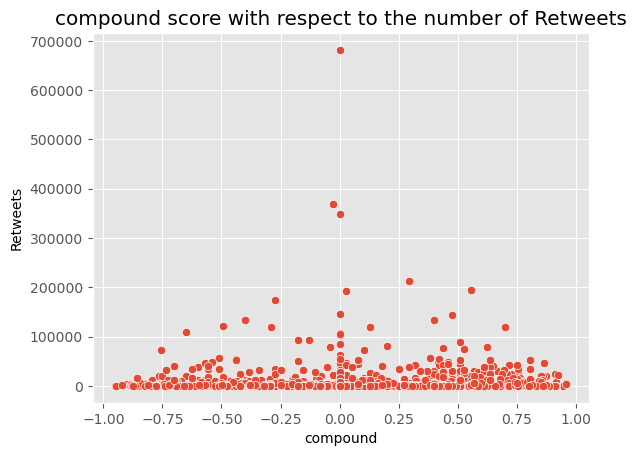

In [17]:
bax = sns.scatterplot(data=vaders, y = 'Retweets' , x = 'compound')
bax.set_title('compound score with respect to the number of Retweets')
plt.show() 

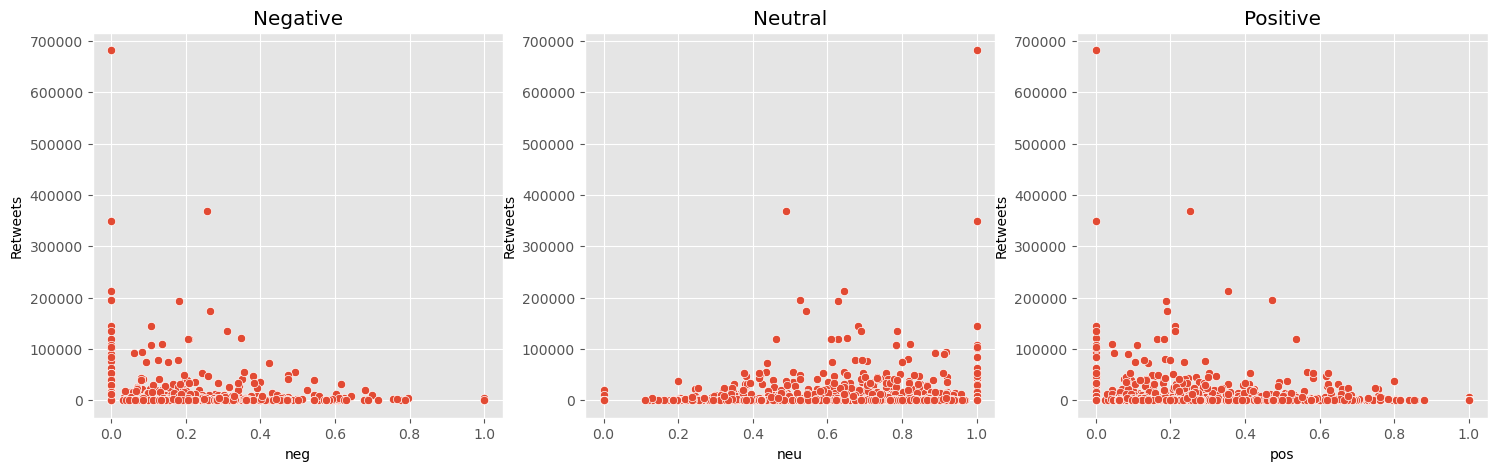

In [18]:
fig, axs = plt.subplots(1,3,figsize = (18,5))
sns.scatterplot(data=vaders, y = 'Retweets' , x = 'neg', ax=axs[0])
sns.scatterplot(data=vaders, y = 'Retweets' , x = 'neu', ax=axs[1])
sns.scatterplot(data=vaders, y = 'Retweets' , x = 'pos', ax=axs[2])
axs[0].set_title('Negative')
axs[1].set_title('Neutral')
axs[2].set_title('Positive')
plt.show() 

In [19]:
negative =vaders['neg'].nunique()
neutral = vaders['neu'].nunique()
positive = vaders['pos'].nunique()
print(negative , neutral , positive )

340 516 457


ROberta Pretrained Model 


In [20]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [23]:
MODEL= f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL) 

In [24]:
#vader results on sample 
print (sample)
sia.polarity_scores(sample)

Several major architectural upgrades in 10.69.3, so it’s much more than a point release, but we’re sticking with 10.69 just cause haha


{'neg': 0.0, 'neu': 0.833, 'pos': 0.167, 'compound': 0.6124}

In [25]:
#running using ROberta Model
encoded_sample = tokenizer(sample, return_tensors='pt')
output = model(**encoded_sample)
scores = output[0][0].detach().numpy()
scores = softmax(scores)
scores_dict = {
    'roberta_neg' : scores[0],
    'roberta_neu' : scores[1],
    'roberta_pos' : scores[2]
}
print(scores_dict)

{'roberta_neg': 0.0049393084, 'roberta_neu': 0.25265178, 'roberta_pos': 0.7424089}


In [26]:
def polarity_scores_roberta(sample):
    encoded_sample = tokenizer(sample, return_tensors='pt')
    output = model(**encoded_sample)
    scores = output[0][0].detach().numpy()
    scores = softmax(scores)
    scores_dict = {
        'roberta_neg' : scores[0],
        'roberta_neu' : scores[1],
        'roberta_pos' : scores[2]
    }
    return scores_dict

In [ ]:
comb = {**Vader_result, **scores_dict}
print(comb)

In [28]:
#res = {}
#for i, row in tqdm(df.iterrows(), total=len(df)):
#    text = row['Cleaned_Tweets']
#    myid = row['ID']
#    Vader_result = sia.polarity_scores(text)
#    vader_results_rename = {}
#    for key ,value in Vader_result.items():
#        vader_results_rename[f"vader_{key}"] = value
#    roberta_result = polarity_scores_roberta(text)
#    both = {**Vader_result, **roberta_result}
#    res[myid] = both
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    try:
        text = row['Cleaned_Tweets']
        myid = row['ID']
        vader_result = sia.polarity_scores(text)
        vader_result_rename = {}
        for key, value in vader_result.items():
            vader_result_rename[f"vader_{key}"] = value
        roberta_result = polarity_scores_roberta(text)
        both = {**vader_result_rename, **roberta_result}
        res[myid] = both
    except RuntimeError:
        print(f'Broke for id {myid}')

  0%|          | 0/2668 [00:00<?, ?it/s]

In [40]:
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns = {'index' : 'ID'})
results_df=results_df.merge(df, how= 'left')

In [41]:
results_df.head()

,ID,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,1,0.0,0.000,1.000,0.4404,0.031408,0.367377,0.601216,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,2,0.0,1.000,0.000,0.0000,0.156082,0.458480,0.385438,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,3,0.0,0.435,0.565,0.3818,0.346872,0.614983,0.038145,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,4,0.0,0.730,0.270,0.3802,0.000797,0.012343,0.986860,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!
4,5,0.0,1.000,0.000,0.0000,0.008892,0.600737,0.390371,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!


Comparing the diffrent models

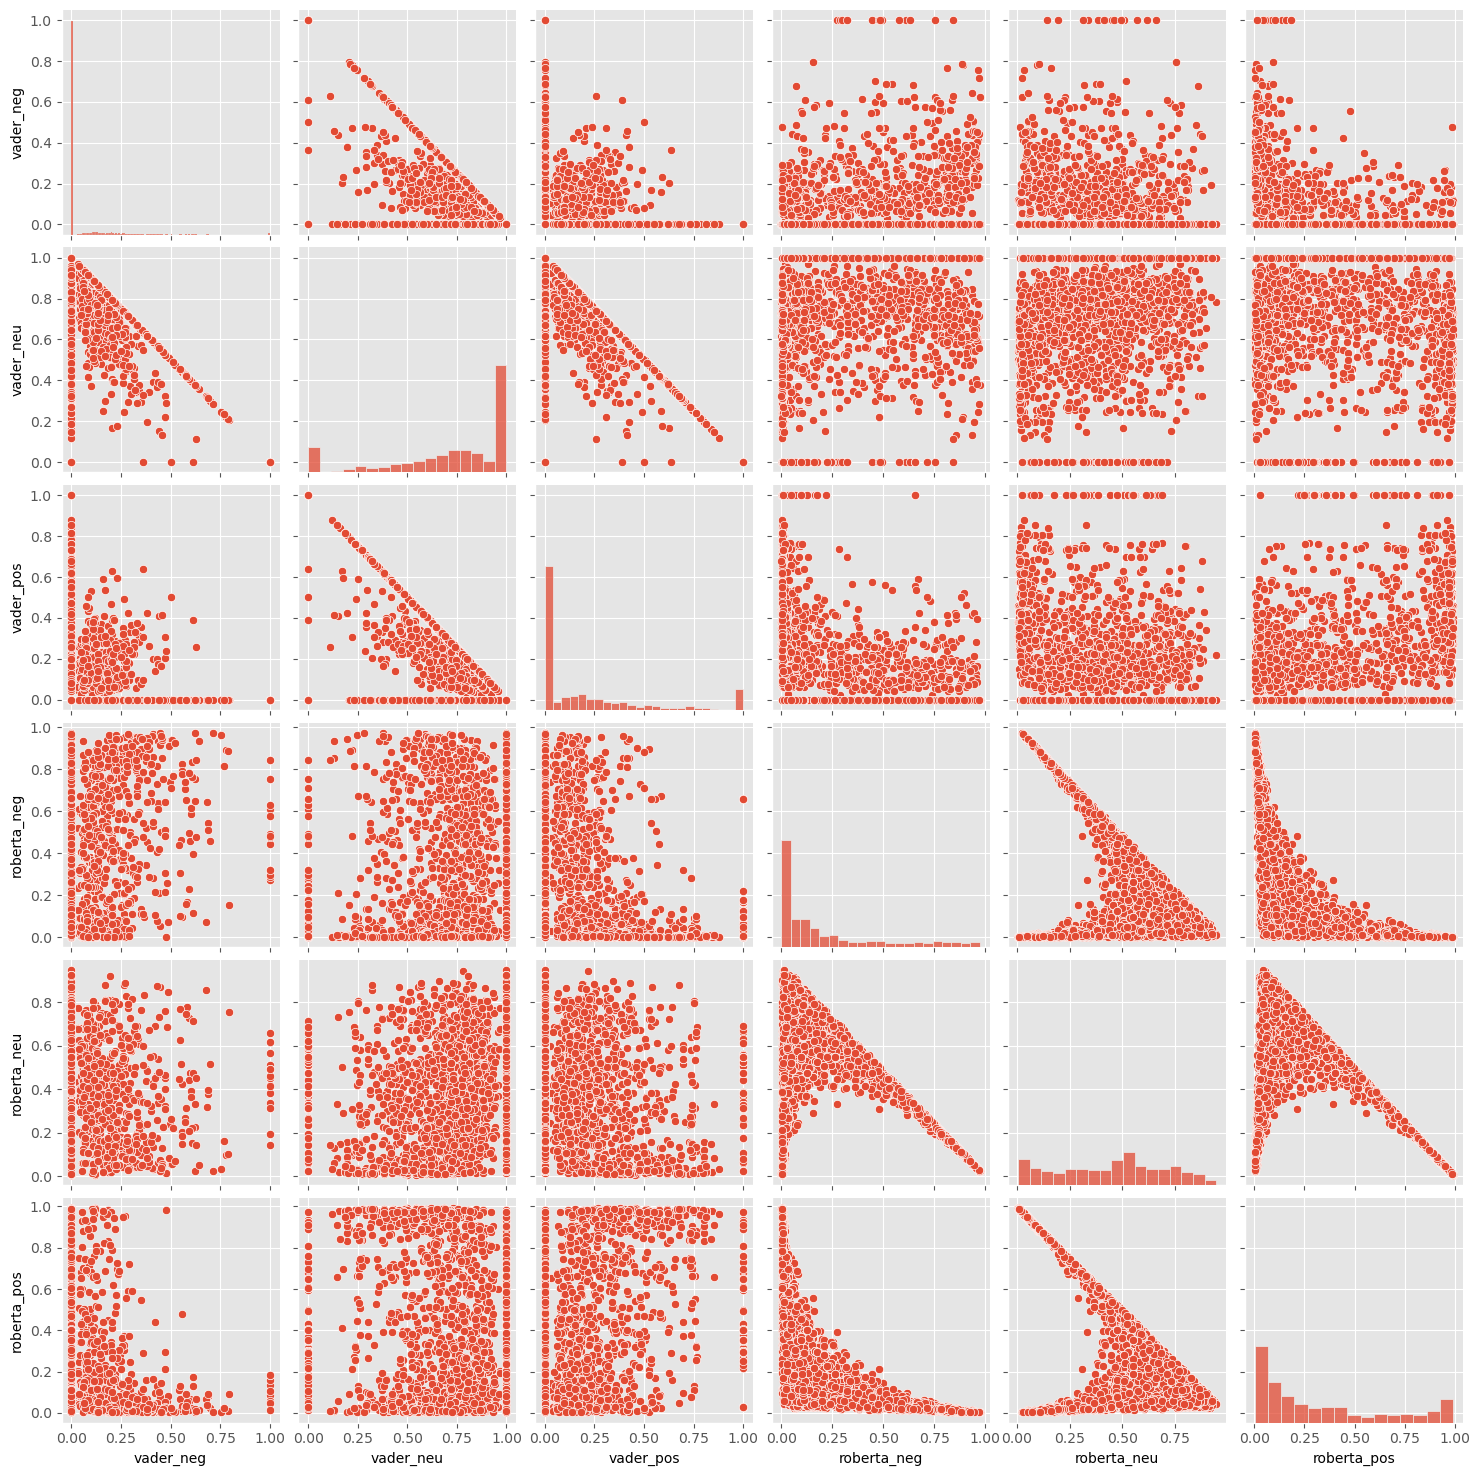

In [64]:
sns.pairplot(data=results_df,
             vars=['vader_neg', 'vader_neu', 'vader_pos',
                  'roberta_neg', 'roberta_neu', 'roberta_pos'],)
plt.show()

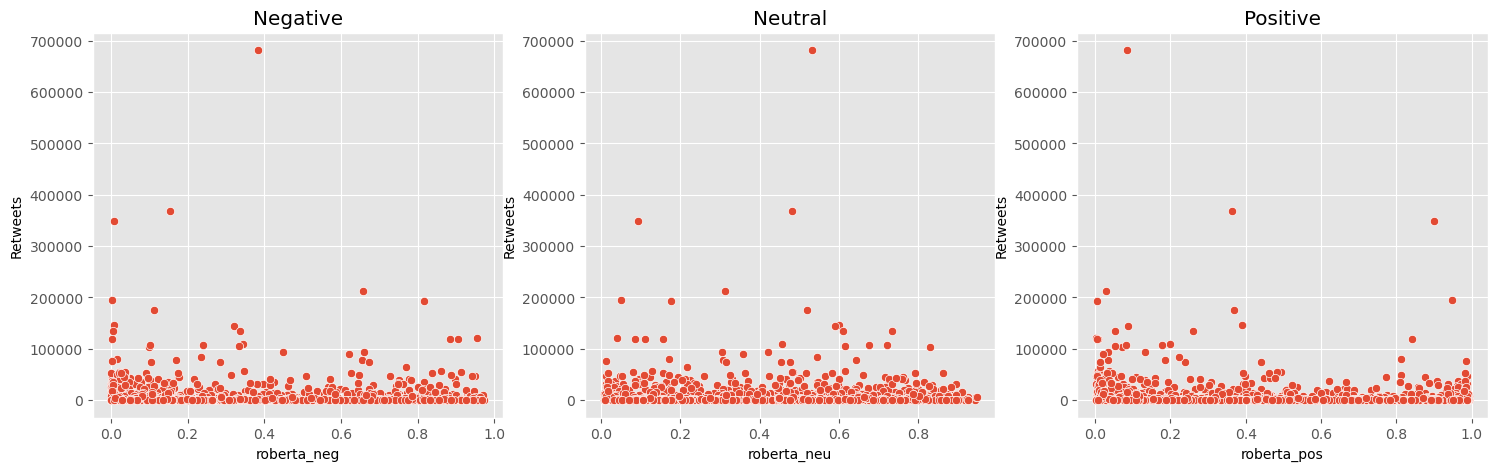

In [69]:
fig, axs = plt.subplots(1,3,figsize = (18,5))
sns.scatterplot(data=results_df, y = 'Retweets' , x = 'roberta_neg', ax=axs[0])
sns.scatterplot(data=results_df, y = 'Retweets' , x = 'roberta_neu', ax=axs[1])
sns.scatterplot(data=results_df, y = 'Retweets' , x = 'roberta_pos', ax=axs[2])
axs[0].set_title('Negative')
axs[1].set_title('Neutral')
axs[2].set_title('Positive')
plt.show() 

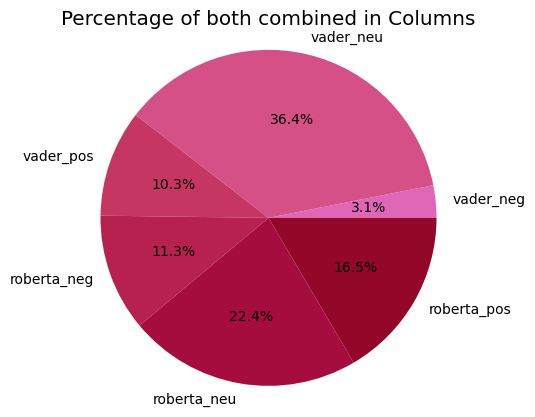

In [66]:
#PIE chart for combined
# Specify the column names for the pie chart
columns = ['vader_neg', 'vader_neu', 'vader_pos',
       'roberta_neg', 'roberta_neu', 'roberta_pos']
colors = ['#E066B7', '#D45087', '#C63663', '#B72150', '#A40D3D', '#930729']
# Calculate the sum of values for each column
sums = results_df[columns].sum()

# Create a pie chart with the percentages
plt.pie(sums, labels=columns,colors=colors,autopct='%1.1f%%')
plt.axis('equal')  # Ensure a circular pie chart
plt.title('Percentage of both combined in Columns')
plt.show()


In [44]:
results_df.columns

Index(['ID', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'Tweets', 'Retweets',
       'Likes', 'Date', 'Cleaned_Tweets'],
      dtype='object')

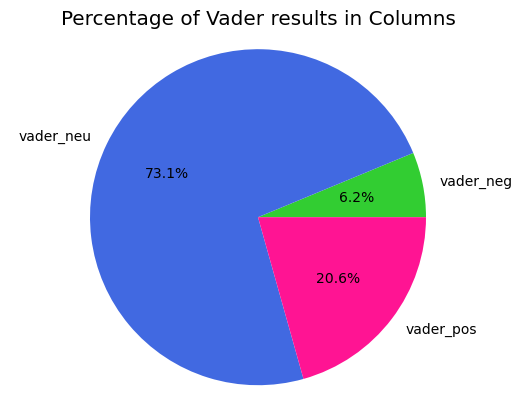

In [67]:
#PIE chart for Vader results
# Specify the column names for the pie chart
columns = ['vader_neg', 'vader_neu', 'vader_pos',]
colors = ['#32CD32', '#4169E1', '#FF1493']
# Calculate the sum of values for each column
sums = results_df[columns].sum()

# Create a pie chart with the percentages
plt.pie(sums, labels=columns,colors=colors,autopct='%1.1f%%')
plt.axis('equal')  # Ensure a circular pie chart
plt.title('Percentage of Vader results in Columns')
plt.show()

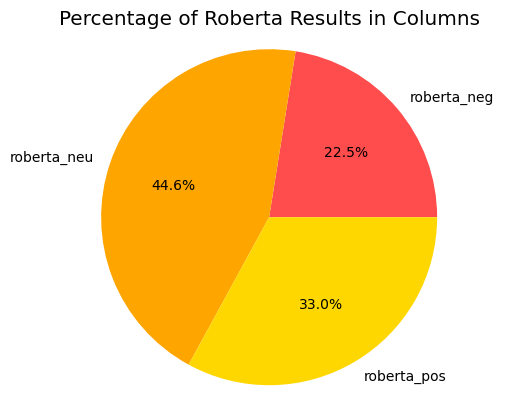

In [68]:
#PIE chart for Roberta results
# Specify the column names for the pie chart
columns = ['roberta_neg', 'roberta_neu', 'roberta_pos']
colors = ['#FF4C4C', '#FFA500', '#FFD700']
# Calculate the sum of values for each column
sums = results_df[columns].sum()

# Create a pie chart with the percentages
plt.pie(sums, labels=columns, colors=colors,autopct='%1.1f%%')
plt.axis('equal')  # Ensure a circular pie chart
plt.title('Percentage of Roberta Results in Columns')
plt.show()